## 第５章 標本の統計量の性質

#### シミュレーションを通して標本の特徴を調べよう。

- 試行 : 一度の実験、調査を行うこと
- 試行回数 : 毎回同じ条件で試行を繰り返すことができる場合、その繰り返し回数のこと

1回の標本抽出シミュレーションは１回の試行といえ、これを繰り返すこと試行回数を増やしていける。

・　標本分布 : 標本の統計量(平均とか分散)が従う確率分布

１回の試行で１つの標本が、１０００回の試行で１０００の標本が母集団から抽出される
$ (ちなみに１つの標本のサンプルサイズは１０個でも１００個でも標本は１つ)$

n個の各標本で標本平均が得られ、n個の標本平均が従う確率分布が"標本分布"。このシミュレーションを繰り返すことで標本の特徴を明らかにする。

<img src="標本抽出.png" width=25%>

### 5-3 ライブラリインポート

In [3]:
import scipy as sp
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

#### 母集団は常に「平均4、標準偏差0.8(分散0.64)の正規分布」とする

In [31]:
# A normal continuous random variable
population = stats.norm(loc=4, scale=0.8)
print "平均: ", population.mean(), "標準偏差: ", population.std()

平均:  4.0 標準偏差:  0.8


### 5-4 標本平均を何度も計算

#### 試行回数を10000回とする

In [18]:
# 標本を格納する入れ物を用意
sample_mean_array = np.zeros(10000)

In [23]:
# 用意した入れ物に標本平均を格納していく

np.random.seed(1) # シード値設定
for i in range(10000):    
    sample = population.rvs(size=10) # サンプルサイズ10の標本抽出シミュレーション        
    sample_mean_array[i] = sp.mean(sample) #各標本平均格納

In [24]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

### 5-5 標本平均の平均値は母平均に近い

In [29]:
# 標本平均の平均値
sp.mean(sample_mean_array)

4.004202422791747

In [32]:
# 標本平均の標準偏差
sp.std(sample_mean_array, ddof=1)

0.2513580850860402

#### 標本平均の標準偏差は母標準偏差より小さくなる

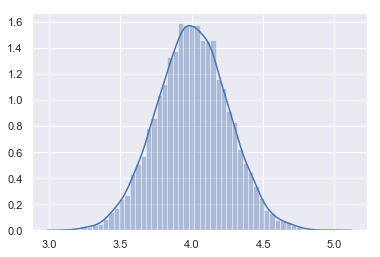

In [35]:
# 標本平均のヒストグラム
_ = sns.distplot(sample_mean_array)

### 5-6 サンプルサイズ大なら、標本平均は母平均に近い

- 調べたいこと： サンプルサイズが大きくなると標本平均は母平均に近づいていく

In [38]:
# 10~100010まで100区切りのサンプルサイズを用意
size_array = np.arange(start = 10, stop=100010, step=100)
size_array[:10]

array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])

In [39]:
# 標本平均を格納する入れ物を用意
sample_mean_array_size = np.zeros(len(size_array))

In [40]:
np.random.seed(1)
for i in range(len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

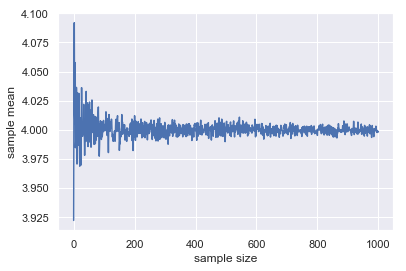

In [76]:
# 横軸にサンプルサイズ、縦軸に標本平均を置いた折れ線グラフ
plt.plot(sample_mean_array_size)
plt.xlabel("sample size")
_ = plt.ylabel("sample mean")

### 5-7 標本平均を何度も計算する関数

In [46]:
# シミュレーションをやりやすくするために「標本平均を何度も計算する関数」を作りましょ
# サンプルサイズと試行回数を引数に渡してやれば標本平均が得られる
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = sp.mean(sample)
    return sample_mean_array

In [49]:
# 動作確認 5-5と一緒
np.random.seed(1)
sp.mean(calc_sample_mean(size=10, n_trial=10000))

4.004202422791747

### 5-8 サンプルサイズを変えた時の標本平均の分布

#### サンプルサイズの影響をより詳細に確かめよう
#### サンプルサイズを10、20、30と変化させていった時の標本平均の分布をバイオリンプロットで確認する

In [62]:
np.random.seed(1)
# サンプルサイズ10
size_10 = calc_sample_mean( size = 10, n_trial = 10000) 
size_10_df = pd.DataFrame({ "sample_mean": size_10, "size" :np.tile(" size 10", 10000) }) 
#サンプル サイズ 20 
size_20 = calc_sample_mean( size = 20, n_trial = 10000) 
size_20_df = pd.DataFrame({ "sample_mean": size_20, "size" :np.tile(" size 20", 10000) }) 
# サンプル サイズ 30 
size_30 = calc_sample_mean( size = 30, n_trial = 10000) 
size_30_df = pd.DataFrame({ "sample_mean": size_30, "size" :np.tile(" size 30", 10000) }) 

# 結合 10000 + 10000 + 10000 = 30000行
sim_result = pd.concat( [size_10_df, size_20_df, size_30_df]) 
# 結果の表示 
sim_result.head()

,sample_mean,size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10
3,3.857140,size 10
4,4.184654,size 10


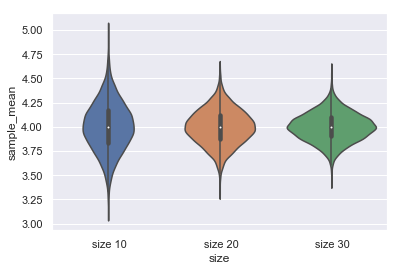

In [64]:
# バイオリンプロット
_ = sns.violinplot(x="size", y="sample_mean", data=sim_result)

#### サンプルサイズが大きくなると標本平均のばらつきが小さくなり、母平均(4)に近くに集中するようになった

### 5-9 標本平均の標準偏差は母標準偏差よりも小さい

#### サンプルサイズが大きくなると標本平均のばらつきが小さくなることを「標本平均の標準偏差」をサンプルサイズ別に見ていくことで確かめる

- 調べたいこと : サンプルサイズが大きくなると標本平均の標準偏差は小さくなっていく → サンプルサイズが大きくなると標本平均はより信頼できる値になっていく

In [72]:
# 2~100を2区切りで変化させたサンプルサイズを用意
size_array = np.arange(start=2, stop=100, step=2)
size_array

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [73]:
# 「標本平均の標準偏差」を格納する入れ物を用意
sample_mean_std_array = np.zeros(len(size_array))

In [74]:
#試行回数100回でシミュレーションを実行
np.random.seed(1)
for i in range(len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof=1)

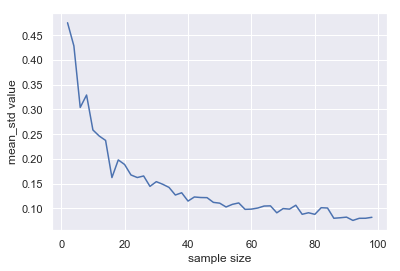

In [77]:
# 横軸にサンプルサイズ、縦軸に「標本平均の標準偏差」を置いた折れ線グラフ を描き ます
plt.plot(size_array, sample_mean_std_array)
plt.xlabel("sample size")
_ = plt.ylabel("mean_std value")

#### サンプルサイズが大きくなると「標本平均の標準偏差」が小さくなっていくことがわかる。サンプルサイズが大きくなるとばらつきの少ない信頼のできる標本平均が得られるということです。

- 標準誤差
    - 理論上の「標本平均の標準偏差」の大きさを"標準誤差"とよび、Standard Error略してSEとして呼ばれます。標準誤差は数式を用いて以下のように計算されます。$\sigma$=標準偏差、N=サンプルサイズ
    
$$標準誤差 = \frac{\sigma}{\sqrt N}$$

#### 標準誤差とシミュレーションの結果の比較

In [82]:
# 標準誤差を求める
standard_error = 0.8/sp.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081])

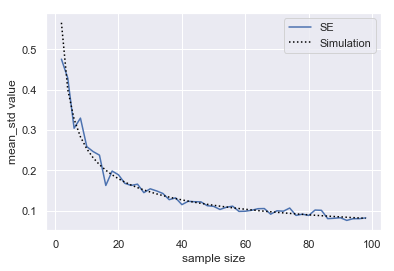

In [92]:
#標準誤差(ドット)とシミュレーションで算出した「標本平均の標準偏差」を重ねてプロット
plt.plot(size_array, sample_mean_std_array)
plt.plot(size_array, standard_error,color="black",  linestyle="dotted")
plt.xlabel("sample size")
plt.ylabel("mean_std value")
_ = plt.legend((u"SE", u"Simulation"))

### 5-11 標準誤差の直感的な説明
標本平均の標準偏差がもともとのデータの標準偏差よりも小さくなるが、それを直感的に説明する。

10人乗りのエレベータに乗り込むお客さんには「大柄なひと」も「小柄な人」も「平均的な人」もいるだろう。たまには全員「大柄なひと」だけのときもあるかもしれない。
だが、100人乗りの飛行機では搭乗するお客さん全員が「大柄な人」もしくは「小柄な人」という可能性はかなり低くなり、さまざまなお客さんが乗り込むだろう。すると乗員の平均体重を見ると極端な値に偏りにくい。
乗員数を１回の調査におけるサンプルサイズだと考えると、標本平均は極端な値に偏りにくい→ばらつきが小さいということ。

### 5-12 標本分散の平均値は、母分散のからずれている。

#### 次は標本分散を対象としたシミュレーションを実行しよう
標本分散を10000回実行して、標本分散の平均値を求める。

In [95]:
sample_var_array = np.zeros(10000)

In [114]:
np.random.seed(1)
for i in range(10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = sp.var(sample, ddof=0)
"""
sample_var_array2 = np.zeros(10000)
np.random.seed(1)
for i in range(10000):
    sample = population.rvs(size=1000)
    sample_var_array2[i] = sp.var(sample, ddof=0)
"""

In [115]:
# 標本分散の平均値
sp.mean(sample_var_array), sp.mean(sample_var_array2)

(0.5746886877332101, 0.6390825527723303)

#### 母分散は標準偏差0.8の2乗＝0.64となるはずなので分散を過小評価していることがわかります。

### 5-13 不偏分散を使うとバイアスがなくなる

In [116]:
unbias_var_array = np.zeros(10000)

np.random.seed(1)
for i in range(10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = sp.var(sample, ddof=1)

In [117]:
sp.mean(unbias_var_array)

0.6385429863702334

#### 0.64付近にあることがわかる。不偏分散の平均値は母分散とみなしてもよさそうである。

### 5.14 サンプルサイズ大なら不偏分散は母分散に近い

- 調べたいこと : サンプルサイズが大きくなると不偏分散は母分散に近く

In [122]:
# 10 ~ 100010 まで100区切りで変化させたサンプルサイズを用意
size_array = np.arange(start=10, stop=100010, step=100)
size_array[:10]

array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])

In [123]:
# 不偏分散を格納する入れ物
unbias_var_array_size = np.zeros(len(size_array))

In [124]:
np.random.seed(1)
for i in range(len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof=1)

Text(0,0.5,'unbias var')

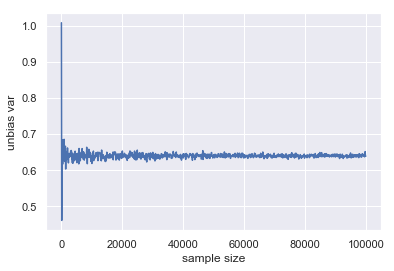

In [125]:
plt.plot(size_array, unbias_var_array_size)
plt.xlabel("sample size")
plt.ylabel("unbias var")

#### サンプルサイズが大きくなるほど不偏分散は母分散に近づいていることがわかる

### 5-15 不偏性
- 不偏性
    - 推定量の期待値が真の母数(母集団のパラメータ)となる特性を不偏性という。不偏性があるということは「平均すると過大にも過小にもなっていない」偏りのない推定量であるということ
    
### 5-16 一致性
- 一致性
    - サンプルサイズが大きくなると推定量が真の母数に近くという特性を一致性という。一致性があるということは「サンプルサイズが無限だった場合には、推定量と母数が一致する」ということ

### 5-17 母数に対する"よい"推定量

#### 分析の目的は母集団分布を推定すること。母集団分布がわかれば道のデータに対して、予測・推測を行うことができる。 ここで母集団分布に正規分布を仮定し、正規分布の母数を推定することで母集団分布を推定することができる。だから、我々は母数を推定したいと願うのである。

#### 正規分布の母数は平均と分散である。正規分布の母数は通常はわかっていない。よって代わりに標本平均と、不偏分散を用いることになる。

#### この章のシミュレーションにおいて「標本平均と不偏分散が母数の推定量として好ましい性質をもつ」ことを明らかにし、「標本平均の平均値」は母平均とほぼ同じであり、「不偏分散の平均値」は母分散とほぼ同じとみなせることを確認した。

#### 標本平均と不偏分散は共に不偏性をもっているといえる。また、サンプルサイズを大きくすると標本平均は母平均に近づき、不偏分散は母分散に近くことから共に一致性をもっていることも確認した。

### 5-18 大数の法則

「標本の大きさが大きくなるにつれて、標本平均が母平均に近く近づき方を表現した法則」となる。

### 5-19 中心極限定理

母集団分布がなんであってもサンプルサイズが大きい時には確率変数の和は正規分布に近いものになる。これを中心極限定理という。

コインを投げた時の確率分布が${P(表), P(裏)} = {\frac{1}{2}, \frac{1}{2}}$となっていたとする。これは正規分布ではないが「コインを10000回投げた時の表になった回数」の分布をとると、これは正規分布によく似た分布になる。

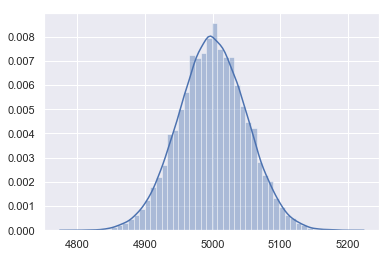

In [128]:
n_size = 10000
n_trial = 50000
#表なら1、裏なら0
coin= np.array([0, 1])
#表が出た回数
count_coin = np.zeros(n_trial)
#コインをn_size回なげる試行をn_trial回繰り返す
np.random.seed(1)
for i in range(n_trial):
    count_coin[i] = sp.sum(np.random.choice(coin, size=n_size, replace=True))
    
_ = sns.distplot(count_coin)

## 第６章 正規分布とその応用


#### 正規分布であることを活かせば、シミュレーションをすることなく、計算をするだけでさまざまなことがわかる。この章では確率密度関数の取り扱いからPythonにおける実装の仕方を説明する。また、正規分布から得られた標本分布としてt分布を導入する。

### 6-2 確率密度

#### 正規分布の確率密度を計算。

$N(x|\mu, \sigma^{2})$ 
$=  \frac{1}{\sqrt{2\pi \sigma^{2}}}$
$ext\{-\frac{(x-\mu)^{2}}{2\sigma^{2}}\}$

In [133]:
#円周率
print sp.pi

#自然対数の底
print sp.exp(1)

3.14159265359
2.718281828459045


#### 平均4、分散0.64の正規分布における確率密度が3であるときの確率密度、すなわち$N(3|4, 0.8^{2})$

In [142]:
# 愚直に計算
x = 3
mu = 4
sigma = 0.8
1/(sp.sqrt(2*sp.pi*sigma**2)) * sp.exp(-((x-mu)**2)/(2*sigma**2))

0.22831135673627742

In [143]:
# scipy.statsのかんすうを使って計算
stats.norm.pdf(loc=4, scale=0.8, x=3)

0.2283113567362774

In [144]:
# 平均4, 標準偏差0.8をもつ正規分布のインスタンスを生成してからpdf関数を適用しても結果は同じ。
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

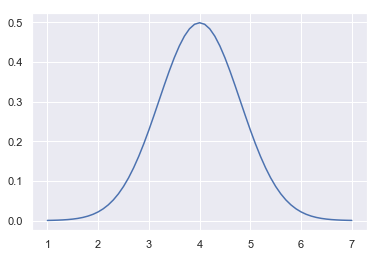

In [148]:
# 確率密度の図示
x_plot = np.arange(start=1, stop=7.1, step=0.1)
_ = plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8))

### 6-3 標本がある値以下となる割合

#### 標本がある値以下となる割合を求めようと思ったら「ある値以下となったデータの個数/サンプルサイズ」を計算すればよい。

#### 母集団分布が$N(x|4, 0.8^{2})$である母集団からの標本抽出シミュレーション

In [149]:
#サンプルサイズ10000
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc=4, scale=0.8, size=100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [150]:
#3以下となるデータの個数は比較演算子を用いて計算可能
sp.sum(simulated_sample<=3)

10371

In [152]:
#サンプルサイズで割る
np.float(sp.sum(simulated_sample<=3))/len(simulated_sample)

0.104

### 6-4 累積分布関数

#### 確率変数xに対して、xを実数とするとき式(3-13)のようにあらわされるF(X)を累積分布関数あるいは分布関数と呼ぶ。
$F(X) = P(X<=x)$

#### これは、「ある値以下となる確率を計算してくれるもの」といったところである。これを使うとわざわざ6-3節のように数え上げる必要はない。

#### 正規分布の場合は積分計算を解くことで求められる。
$P(X<=3) = \int_{-\infty}^{3} \frac{1}{\sqrt{2\pi \sigma^{2}}} $
$ext\{-\frac{(x-\mu)^{2}}{2\sigma^{2}}\} dx$

#### つまり「-$\infty$から3までの確率密度をすべて足し合わせたもの」と解釈できる

### 6-5 累積分布関数の実装

#### stats.normのcdf関数を使えるよ。cdfとは「Cumulative Distribution Function」の略です。

母集団が$N(x|4, 0.8^{2})$に従う時

In [155]:
stats.norm.cdf(loc=4, scale=0.8, x=3)

0.10564977366685535

#### 6-3節の結果とほぼ一致していることを確認しましょう

#### 正規分布は平均に対して左右対称なので、「データが平均値以下になる確率」は50%と計算される

In [157]:
stats.norm.cdf(loc=4, scale=0.8, x=4)

0.5

#### データを数え上げることなく、積分計算により確率を簡単に計算することができるのが「母集団分布に正規分布を仮定した」ことのメリットである。

### 6-6 下側確率とパーセント点

#### データがある値以下となる確率のことを下側確率と呼ぶ。逆に「ある確率になる基準値」のことをパーセント点、または下側パーセント点と呼ぶ。

#### パーセント点の計算はstats.normのppf関数を使う。ppfとは「Percent Point Function」の略です

In [159]:
#上記同様の正規分布のもと「下側確率2.5%」となるパーセント点を求める。
stats.norm.ppf(loc=4, scale=0.8, q=0.025)

2.4320288123679563

In [162]:
#下側確率とパーセント点の関係から以下の関係が成り立つ
sitagawa = stats.norm.cdf(loc=4, scale=0.8, x=3)
print "データが3以下となる確率: ", sitagawa 
stats.norm.ppf(loc=4, scale=0.8, q=sitagawa)

データが3以下となる確率:  0.10564977366685535


3.0000000000000004

### 6-8 標準正規分布

#### 平均0、分散(標準偏差)1の正規分布のことを標準正規分布と呼ぶ。すなわち$N(x|0,1)$

### 6-9 t値

#### t値は以下のように計算される統計量である。$\mu^{-}$は標本平均で$\mu$は母平均、$\sigma^{-}$は標本から計算された標準偏差でNはサンプルサイズ
$t = \frac{\mu^{-} - \mu}{\frac{\sigma^{-}}{\sqrt{N}}}$
$= \frac{標本平均 - 母平均}{標準誤差}$

#### t値は標準化とよく似た計算式になっている。標準化とは平均0、分散1にする変換のことであった。「(データ - 平均) / 標準偏差」という計算をすることで標準化できる。

#### 標準誤差は「標本平均の標準偏差」と見做すことができる。そこで「(標本平均 - 母平均)/標準誤差」は標本平均に対する標準化とみなすことができそうである。しかし、この計算をしても分散は1にならない。なぜならば、「標本から計算された標準誤差」で割っているからである。??????

### 6-10 t値の標本分布

#### t値の標本分布をシミュレーションで確認

1. 母集団分布が$N(x|4,0.8^{2})$である母集団から標本抽出シミュレーションを行う。サンプルサイズ10
2. 得られた標本から標本平均を求める
3. 得られた標本から標準誤差を求める
4. 「(標本平均 - 母平均)/標準誤差という計算により、t値を計算
5. この試行を10000回繰り返す

In [170]:
np.random.seed(1)

# t値を格納する入れ物
t_value_array = np.zeros(10000)

# 正規分布クラスのインスタンス
norm_dist = stats.norm(loc=4, scale=0.8)

for i in range(10000):
    sample = norm_dist.rvs(size=10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof=1) #不偏標準偏差
    sample_se = sample_std/sp.sqrt(len(sample)) #標準誤差
    t_value_array[i] = (sample_mean - 4)/sample_se

#### 「t値」のヒストグラム、「t値」の標本分布 + 標準正規分布の確率密度

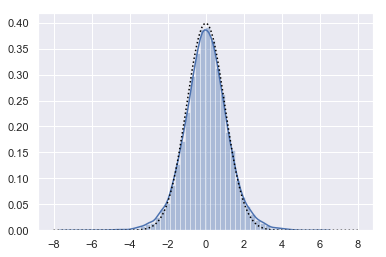

In [171]:
sns.distplot(t_value_array)
x = np.arange(start=-8, stop=8.1, step=0.1)
_ = plt.plot(x, stats.norm.pdf(x=x), linestyle="dotted", color="black")

### 6-11 t分布

#### 母集団分布が正規分布である時のt値の標本分布のことをt分布と呼ぶ。

#### t分布の平均値は0、分散は1よりすこし大きくなる。自由度をnと置くと分散は以下のように計算される。(n>2)

$t(n)の分散 = \frac{n}{n-2}$

#### 自由度(すなわちサンプルサイズ)が大きくなると、分散は1に近づき、標準正規分布とほとんど違いが見られなくなる。逆に言えば、サンプルサイズが小さい場合は大きな差となる。

### 6-12 t分布

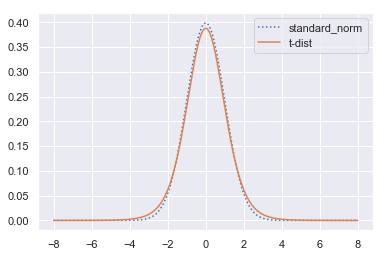

In [176]:
plt.plot(x, stats.norm.pdf(x=x), linestyle="dotted")
plt.plot(x, stats.t.pdf(x=x, df=9))
_ = plt.legend((u"standard_norm", u"t-dist"))

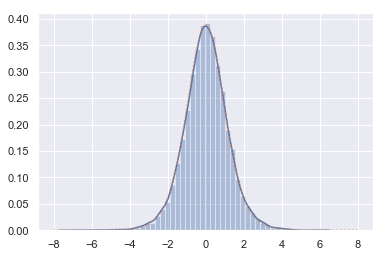

In [181]:
sns.distplot(t_value_array, norm_hist=True)
_ = plt.plot(x, stats.t.pdf(x=x, df=9), linestyle="dotted")

#### t分布の意義は、母分散がわかっていない状況であっても、標本平均の分布について言及することができるということである。

## 7章

In [183]:
fish = pd.read_csv("/Users/ieuser/Downloads/sample/3-7-1-fish_length.csv")["length"]
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

In [191]:
# 平均値
mu = sp.mean(fish)
print "平均値: ", mu

平均値:  4.187039324504523


In [186]:
# 自由度
df = len(fish) -1
print "自由度: ", df

自由度:  9


In [189]:
sigma = sp.std(fish, ddof=1)
se = sigma/sp.sqrt(len(fish))
print "標準誤差: ", se

標準誤差:  0.2608259396768776


In [201]:
interval = stats.t.interval(alpha = 0.95, df=df, loc=mu, scale=se)
print "信頼区間: "
print "下側信頼限界: ", interval[0]
print "上側信頼限界: ", interval[1]

信頼区間: 
下側信頼限界:  3.597010056835825
上側信頼限界:  4.777068592173221


In [196]:
t_975 = stats.t.ppf(q=0.975, df = df)
t_975

2.2621571627409915

In [198]:
lower = mu - t_975*se
lower

3.597010056835825

In [199]:
upper = mu + t_975*se
upper

4.777068592173221

#### 分散を大きくすると、区間が広く

In [202]:
se2 = (sigma*10)/sp.sqrt(len(fish))
interval2 = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se2)

print "信頼区間: "
print "下側信頼限界: ", interval2[0]
print "上側信頼限界: ", interval2[1]

信頼区間: 
下側信頼限界:  -1.7132533521824618
上側信頼限界:  10.087332001191509


#### データ量(自由度)を大きくすると、区間が狭く

In [203]:
df2 = (len(fish)*10)-1
se3 = sigma/sp.sqrt(len(fish)*10)
interval3 = stats.t.interval(alpha=0.95, df=df2, loc=mu, scale=se3)

print "信頼区間: "
print "下側信頼限界: ", interval3[0]
print "上側信頼限界: ", interval3[1]

信頼区間: 
下側信頼限界:  4.0233803082774395
上側信頼限界:  4.350698340731607


#### 信頼係数を大きくとると、区間が広く

In [204]:
stats.t.interval(alpha=0.99, df=df, loc=mu, scale=se)

(3.3393979149413977, 5.034680734067649)

#### シミュレーションを通して区間推定の結果の解釈をしよう

In [208]:
#信頼区間が母平均を含んでいればTreuをとる変数を用意

be_included_array = np.zeros(20000, dtype="bool")
be_included_array

array([False, False, False, ..., False, False, False])

In [209]:
#　「95%信頼区間を求める」試行を20000回繰り返す
#　信頼区間が母平均を含んでいればTreu

np.random.seed(1)
norm_dist = stats.norm(loc=4, scale=0.8)
for i in range(0, 20000):
    sample = norm_dist.rvs(size=10)
    df = len(sample) -1
    mu = sp.mean(sample)
    std = sp.std(sample, ddof=1)
    se = std/sp.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if interval[0]<=4 and interval[1] >= 4:
        be_included_array[i] = True

In [211]:
# 信頼区間が母平均を含んでいた割合を求める

np.float(sum(be_included_array))/len(be_included_array)

0.948

#### 信頼度・信頼係数95％のときの信頼区間：100回の標本調査のうち95回はこの範囲に母平均がある。